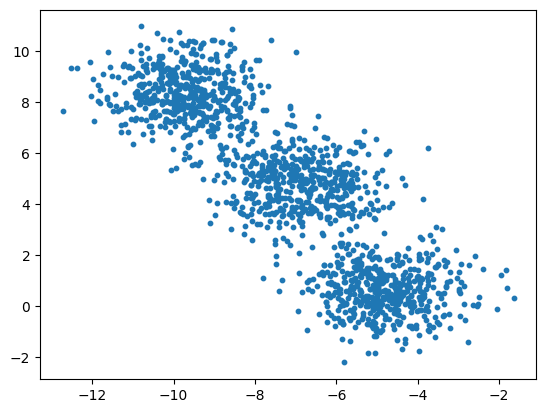

Cluster Membership: [1 1 2 ... 0 1 1]


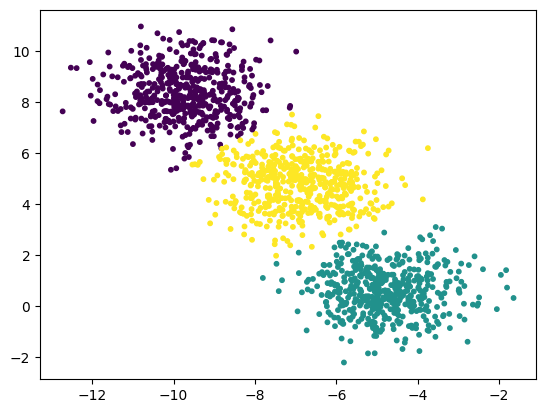

In [1]:
from pyckmeans import CKmeans
from matplotlib import pyplot as plt
import sklearn.datasets

# simulate dataset
# 50 samples, 2 features, 3 true clusters
x, _ = sklearn.datasets.make_blobs(n_samples=1500, n_features=2, random_state=12)

plt.scatter(x[:, 0], x[:, 1], s=10)
plt.show()
# apply Consensus K-Means
# 3 clusters, 100 K-Means runs,
# draw 80% of samples and 50% of features for each single K-Means
ckm = CKmeans(k=3, n_rep=100)
ckm.fit(x)
ckm_res = ckm.predict(x)
# plot consensus matrix and consensus clustering
#fig = ckm_res.plot(figsize=(7,7))

# consensus matrix
#ckm_res.cmatrix

# clustering metrics
# print('Bayesian Information Criterion:', ckm_res.bic)
# print('Davies-Bouldin Index:', ckm_res.db)
# print('Silhouette Score:', ckm_res.sil)
# print('Calinski-Harabasz Index:', ckm_res.ch)
#
# # consensus clusters
print('Cluster Membership:', ckm_res.cl)
plt.scatter(x[:, 0], x[:, 1], s=10, c=ckm_res.cl)

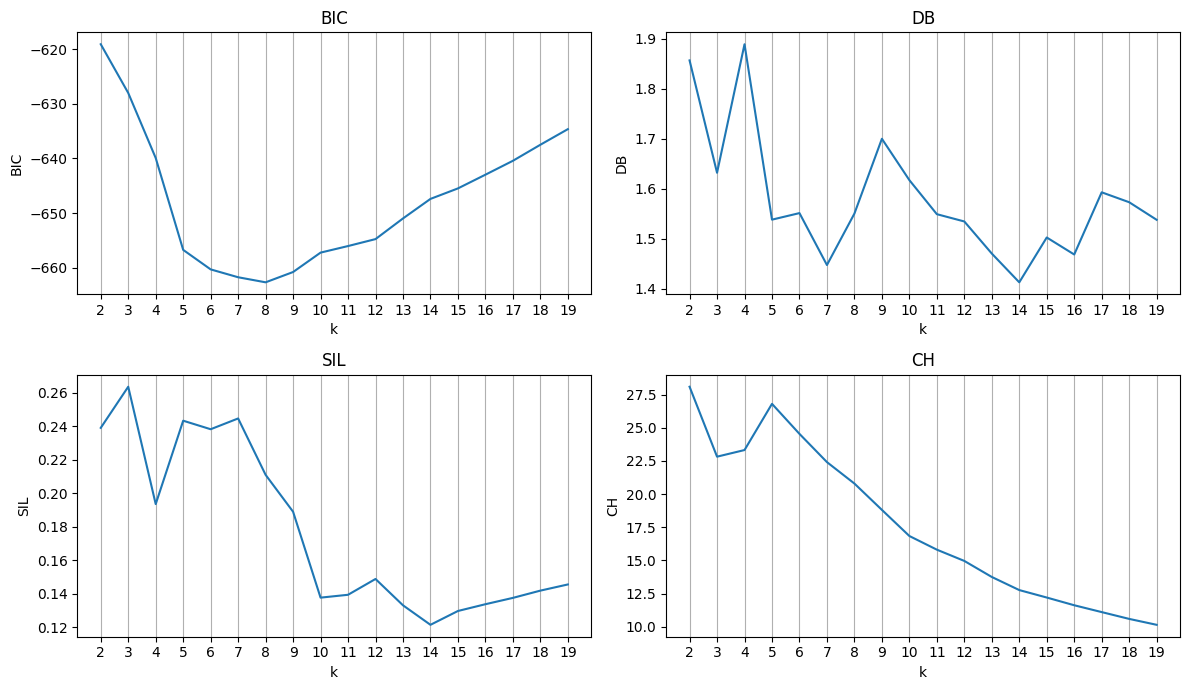

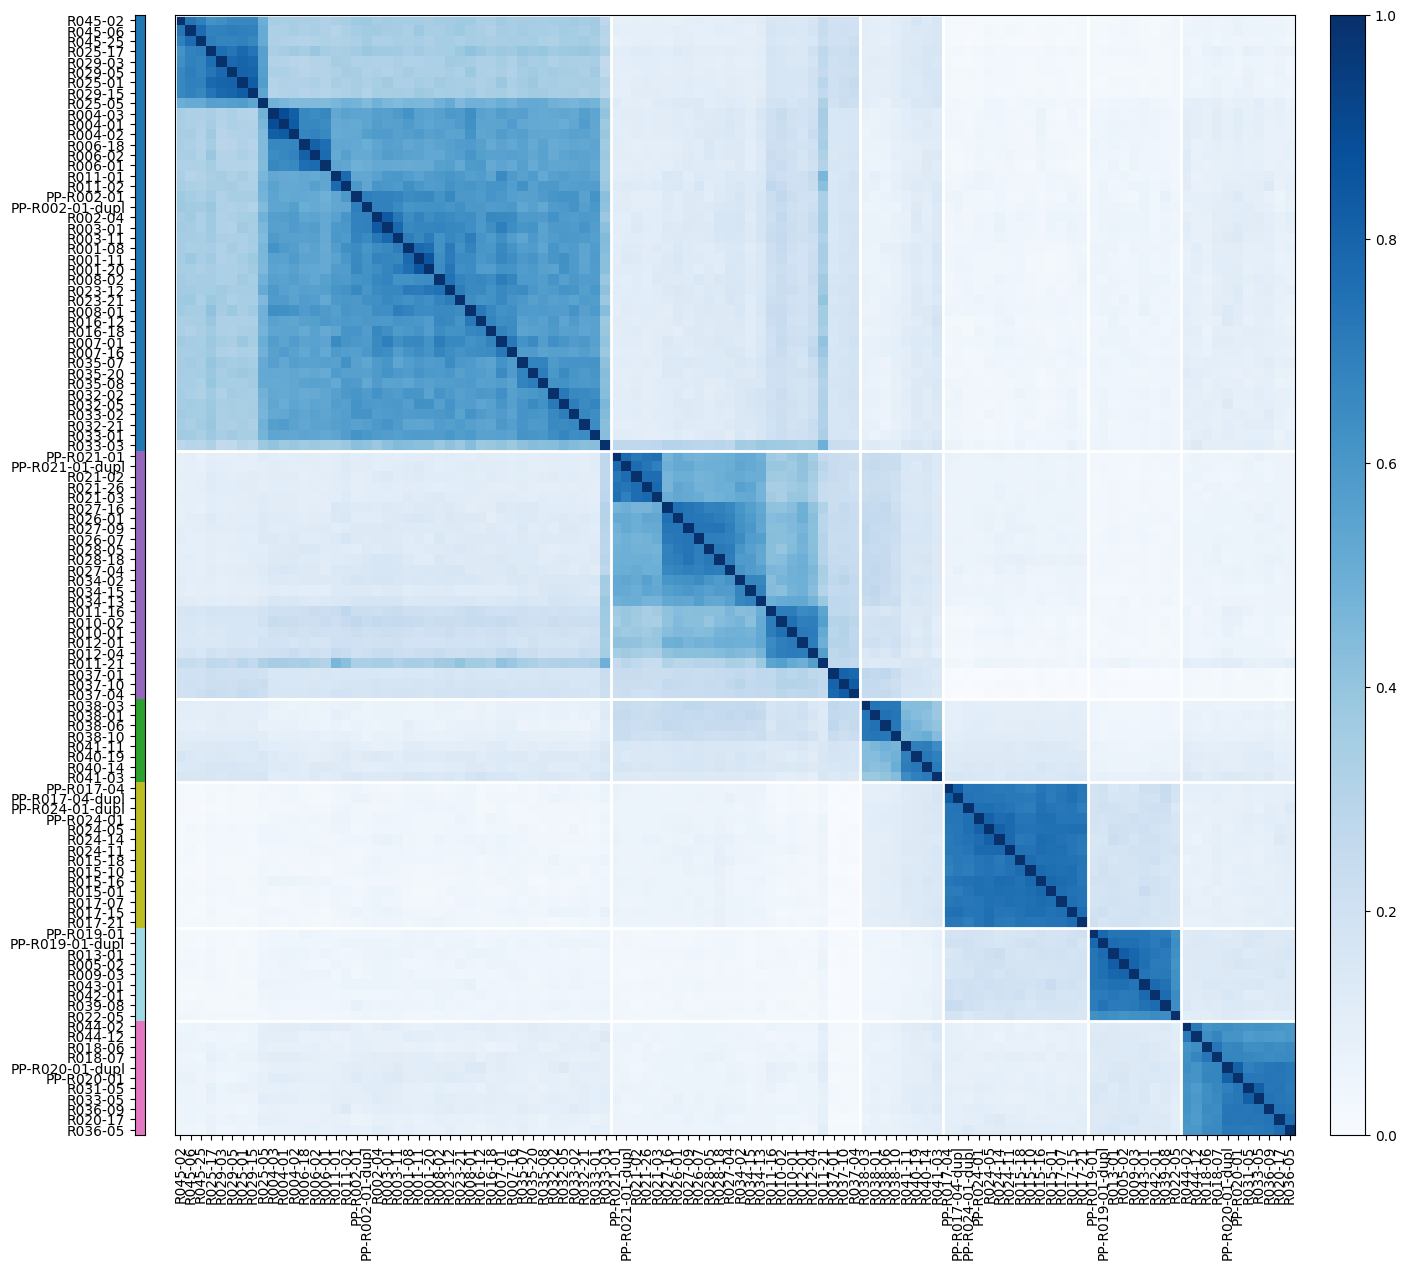

In [2]:
from pyckmeans import WECR, NucleotideAlignment, pcoa

# Load nucleotide alignment
aln = NucleotideAlignment.from_file('datasets/rhodanthemum_ct85_msl68.snps.phy')

# Calculate Kimura 2-parameter distances
dst = aln.distance(distance_type='k2p')

# Apply PCoA, including negative Eigentvalue correction
pcoa_res = pcoa(dst, correction='lingoes')

# Get Eigenvectors until the cumulative corrected Eigenvalues are >= 0.8
vectors = pcoa_res.get_vectors(
    filter_by='eigvals_rel_corrected_cum',
    filter_th=0.8,
    out_format='pandas'
)

# Apply WECR K-Means
wecr = WECR(
    k=range(2, 20),
    n_rep=1000,
    p_samp=0.6,
    p_feat=0.6,
)
wecr.fit(vectors)
wecr_res = wecr.predict(vectors)

# Plot clustering metrics for each k
wecr_res.plot_metrics(figsize=(12, 7))

# Select a 'good' K (e.g., 6, 7, 8) for the consensus clustering
wecr_res.plot(k=6, figsize=(14,14))

cluster_membership = wecr_res.get_cl(k=6, with_names=True)

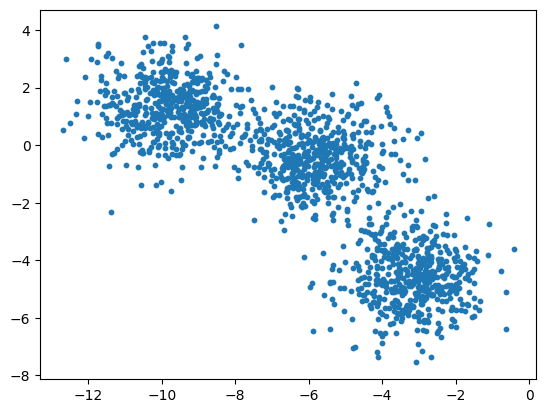

Metrics:
   k       sil          bic        db            ch
0  2  0.729053  4455.125066  0.386050   5915.417792
1  3  0.742692  2390.647452  0.372855  13993.056866
2  4  0.565675  2377.585368  0.973116   9456.788964
3  5  0.529347  2331.441208  1.288808   7358.564329


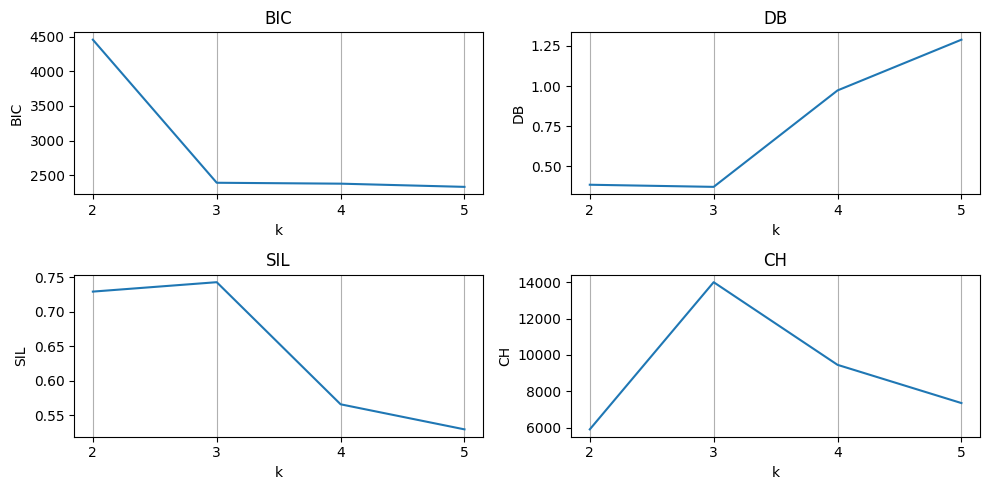

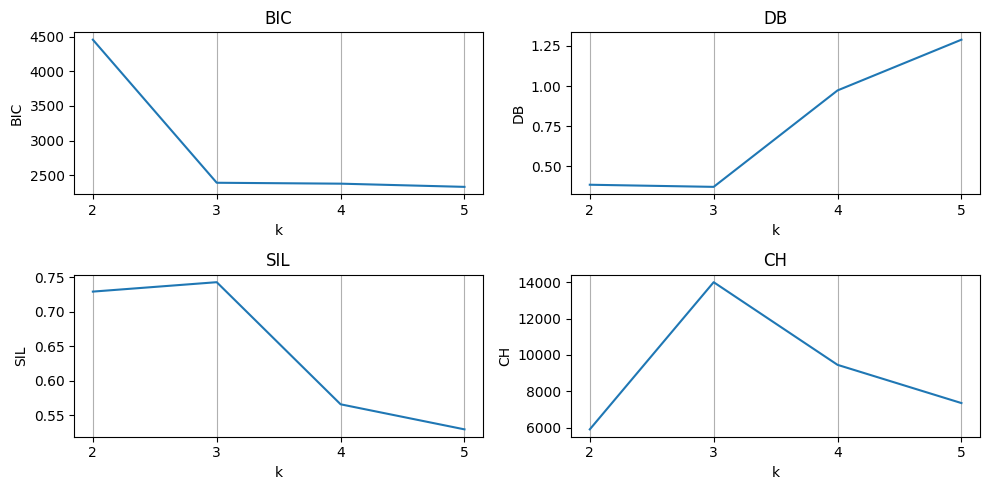

In [3]:
from pyckmeans import MultiCKMeans
import sklearn.datasets

# simulate dataset
# 50 samples, 10 features, 3 true clusters
x, _ = sklearn.datasets.make_blobs(n_samples=1500, n_features=5, random_state=22)
plt.scatter(x[:, 0], x[:, 1], s=10)
plt.show()
# apply multiple Consensus K-Means for
# k = 2, ..., 5
# 100 K-Means runs per Consensus K-Means
# draw 80% of the sample for each single K-Means
# draw 50% of the features for each single K-Means
mckm = MultiCKMeans(k=[2, 3, 4, 5], n_rep=100)
mckm.fit(x)
mckm_res = mckm.predict(x)

# clustering metrics
print('Metrics:')
print(mckm_res.metrics)

# plot clustering metrics against k
# BIC, DB: lower is better
# SIL, CH: higher is better
mckm_res.plot_metrics(figsize=(10,5))


# get a single CKmeansResult                  0 |1| 2  3
# ckm_res_k3 = mckm_res.ckmeans_results[1] # k=[2, 3, 4, 5]
# ckm_res_k3.cl

# ...
# see "Clustering a Data Matrix (Single K)"

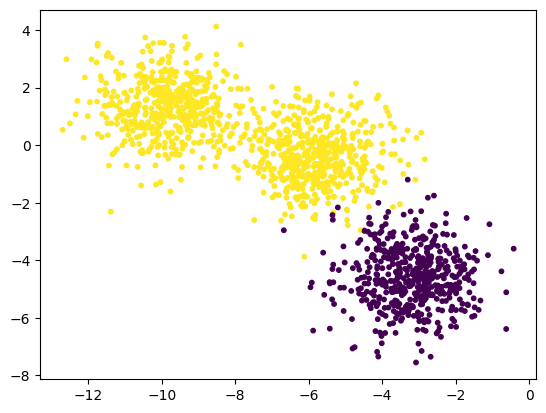

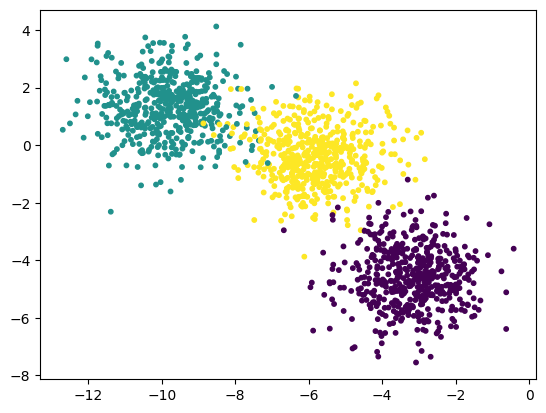

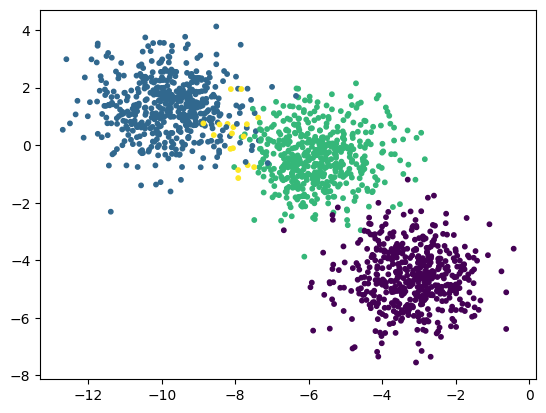

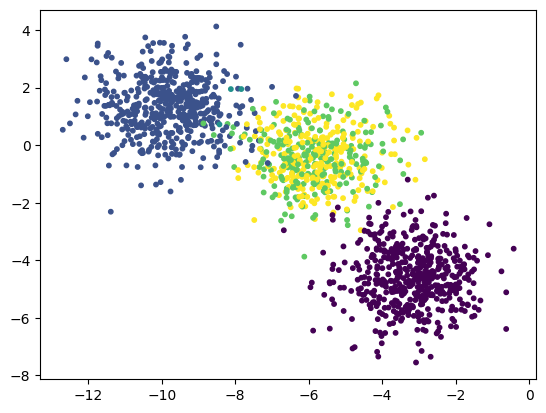

In [4]:
plt.scatter(x[:, 0], x[:, 1], s=10, c=mckm_res.ckmeans_results[0].cl)
plt.show()
plt.scatter(x[:, 0], x[:, 1], s=10, c=mckm_res.ckmeans_results[1].cl)
plt.show()
plt.scatter(x[:, 0], x[:, 1], s=10, c=mckm_res.ckmeans_results[2].cl)
plt.show()
plt.scatter(x[:, 0], x[:, 1], s=10, c=mckm_res.ckmeans_results[3].cl)
plt.show()